In [1]:
########################################
# importing packages
########################################
import pandas            as pd                          # data science essentials
import matplotlib.pyplot as plt                         # fundamental data visualization
import seaborn           as sns                         # enhanced visualizations
from sklearn.preprocessing import StandardScaler        # standard scaler
from sklearn.decomposition import PCA                   # pca
from scipy.cluster.hierarchy import dendrogram, linkage # dendrograms
from sklearn.cluster         import KMeans              # k-means clustering

In [2]:
########################################
# loading data and setting display options
########################################
# loading data
my_df = pd.read_excel('Survey_Data_Final_Exam.xlsx')


# setting print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

In [3]:
# Changing the names of columns

#Change the column names 
my_df.columns = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', 
              '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', 
              '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', 
              '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', 
              '41', '42', '43', '44', '45', '46', '47', '48', '49', '50',
              'DNA_1', 'DNA_2', 'DNA_3', 'DNA_4', 'DNA_5', 'DNA_6', 'DNA_7',
              'DNA_8', 'DNA_9', 'DNA_10', 'DNA_11', 'DNA_12', 'DNA_13', 
              'DNA_14', 'DNA_15', 'DNA_16', 'DNA_17', 'DNA_18', 'DNA_19', 
              'DNA_20', 'DNA_21',
              'Current laptop',
              'Next laptop',
              'Program',
              'Age',
              'Gender',
              'Nationality', 
              'Ethnicity']

In [4]:
# Changing demographic data

placeholder_lst = []

for age in my_df['Age']:
    
    if age <= 20:
        age_range = '<20'
    
    elif age > 20 and age <= 25:
        age_range = '20-25'
    
    elif age > 25 and age <= 30:
        age_range = '26-30'
        
    elif age > 30 and age <= 35:
        age_range = '31-35'
    
    elif age > 36 and age <= 40:
        age_range = '36-40'
        
    elif age > 40:
        age_range = '>40'
        
    placeholder_lst.append(age_range)
    
my_df['age_range'] = placeholder_lst

In [5]:
# create a placeholder list
placeholder_lst = []

# create a list for nationality change
nation_change = [[['china'],'chinese'],
                 [['peru'], 'peruvian'],
                 [['mexico'], 'mexican'],
                 [['usa'], 'american'],
                 [['russia'], 'russian'],
                 [['ecuador'], 'ecuadorian'],
                 [['brazil'], 'brazilian'],
                 [['nigeria'], 'nigerian'],
                 [['korea','republicofkorea','southkorea'],'korean'],
                 [['spain'],'spanish'],
                 [['indonesia'],'indonesian'],
                 [['germany'],'german'],
                 [['colombia'], 'colombian'],
                 [['taiwan', 'taiwan(roc)'], 'taiwanese'],
                 [['japan'], 'japanese'],
                 [['canada'], 'canadian'],
                 [['philippines'], 'filipino'],
                 [['thailand'], 'thai'],
                 [['india'], 'indian'],
                 [['czechrepublic'], 'czech'],
                 [['belgium'], 'belgian'],
                 [['english'], 'british'],
                 [['ghana'], 'ghanaian'],
                 [['.', 'hispanic'], 'prefernottoanswer'],
                 [['italianandspanish', 'german/american', 'french/brazilian', 'british,indian', 'caribbean-american'], 'multi-ethnic'],
                 [['costarica'], 'costarrican'],
                 [['congolese(drcongo)'], 'congolese'],
                 [['venezuela'],'venezuelan'],
                 [['dominicanrepublic'],'dominican']
                
                ]

# create a for loop
for nationality in my_df['Nationality']:
    
    # remove " " and "."
    nationality = nationality.lower().replace(" ","").replace(".","")
    
    # create a loop
    for old_nat, new_nat in nation_change:
    
        # create if statement to check if nationality is wrong
        if nationality in old_nat:
            nationality = new_nat
    
    # append the correct nationality to a list
    placeholder_lst.append(nationality)

# create a new column
my_df['Nationality2'] = placeholder_lst

In [6]:
# create a placeholder list
placeholder_lst = []

# create a for loop
for nationality in my_df['Nationality2']:
    
    # check if nationality is in Asia
    if nationality in ['indian','chinese','taiwanese','filipino','korean',
                       'thai','indonesian','vietnamese','japanese','palestinian',
                       'kyrgyz','pakistani','bangladeshi','iran','malaysia']:
        nationality = 'Asian'
    
    # check if nationality is in Europe
    elif nationality in ['german','russian','italian','spanish','norwegian',
                         'turkish','belgian','czech','british','swiss',
                         'ukrainian','portuguese','belarus','dutch','poland',
                         'armenia','dutch']:
        nationality = 'European'
    
    # check if nationality is in North America
    elif nationality in ['mexican','american','canadian','dominican','costarrican',
                         'panama','guatemalan','elsalvador','honduran']:
        nationality = 'North American'
    
    # check if nationality is in South America
    elif nationality in ['peruvian','colombian','brazilian','ecuadorian',
                         'venezuelan']:
        nationality = 'South American'
    
    # check if nationality is in Africa
    elif nationality in ['nigerian','kenyan','congolese','ghanaian','ugandan',
                         'mauritius','southafrican','cameroon']:
        nationality = 'Africa'
    
    # check if nationality is multi-ethnic
    elif nationality == 'multi-ethnic':
        nationality = 'multi-ethnic'
    
    # put 'prefernottoanswer' for the remaining
    else: 
        nationality = 'prefernottoanswer'
    
    # append the new nationality group to a list
    placeholder_lst.append(nationality)

# create a new column
my_df['Nationality_continent'] = placeholder_lst

In [7]:
########################################
# Standardize the columns for negative question 
########################################
# DNA_2 to DNA_2n

placeholder_lst = []

for value in my_df['DNA_2']:
    
    if value == 1:
        DNA_2n = 5
    
    elif value == 2:
        DNA_2n = 4
    
    elif value == 3:
        DNA_2n = 3
        
    elif value == 4:
        DNA_2n = 2
    
    elif value == 5:
        DNA_2n = 1
        
    placeholder_lst.append(DNA_2n)
    
my_df['DNA_2n'] = placeholder_lst

# DNA_12 to DNA_12_n

placeholder_lst = []

for value in my_df['DNA_12']:
    
    if value == 1:
        DNA_12n = 5
    
    elif value == 2:
        DNA_12n = 4
    
    elif value == 3:
        DNA_12n = 3
        
    elif value == 4:
        DNA_12n = 2
    
    elif value == 5:
        DNA_12n = 1
        
    placeholder_lst.append(DNA_12n)
    
my_df['DNA_12n'] = placeholder_lst

# DNA_16 to DNA_16n

placeholder_lst = []

for value in my_df['DNA_16']:
    
    if value == 1:
        DNA_16n = 5
    
    elif value == 2:
        DNA_16n = 4
    
    elif value == 3:
        DNA_16n = 3
        
    elif value == 4:
        DNA_16n = 2
    
    elif value == 5:
        DNA_16n = 1
        
    placeholder_lst.append(DNA_16n)
    
my_df['DNA_16n'] = placeholder_lst

In [8]:
# Drop the columns
my_df = my_df.drop('DNA_2', axis = 1)
my_df = my_df.drop('DNA_12', axis = 1)
my_df = my_df.drop('DNA_16', axis = 1)

In [9]:
########################################
# Group
########################################

# Growth/Fixed mindset, ['DNA_4']
# ['growth_mindset'], ['fixed_mindset']
# placeholder_lst = []
# for value in my_df['DNA_4']:
#     if value >3 :
#         placeholder_lst.append(1)
    
#     else:
#          placeholder_lst.append(0)
    
my_df['Growth mindset'] = my_df['DNA_4']

# # saving new columns
# new_columns = my_df.columns

In [10]:
########################################
# Positive thinking, ['DNA_3']['DNA_19'],['DNA_5']=['DNA_8']
# ['need_improve_thiking'],['positive_thinking']
my_df['thinking'] = my_df[['DNA_3', 'DNA_19','DNA_5','DNA_8']].mean(axis=1)
# placeholder_lst = []
# for value in my_df['thinking']:
#     if value > 4.25 :
#          placeholder_lst.append(1)
    
#     else:
#          placeholder_lst.append(0)
        
    
# my_df['high_thinking'] = placeholder_lst


# # saving new columns
# new_columns = my_df.columns

In [11]:
########################################
# Communicator/ Need_improve_communication, ['DNA_11'],['DNA_6']=['DNA_9']
# ['DNA_2n'], ['DNA_12n'],['DNA_17']
my_df['communication'] = my_df[['DNA_11', 'DNA_6','DNA_9','DNA_2n','DNA_12n','DNA_17']].mean(axis=1)

# # my_df['CMT'] has the mean 3.75
# placeholder_lst = []
# for value in my_df['CMT']:
#     if value > 3.75 :
#         placeholder_lst.append(1)
    
#     else:
#         placeholder_lst.append(0)
        
    
# my_df['high_communicating'] = placeholder_lst

# new_columns = my_df.columns

In [12]:
########################################
# Team player/ Independent, ['DNA_13'],['DNA_14'], ['DNA_16n'], 
# ['DNA_7']=['DNA_10'], ['DNA_19'],['DNA_20'],['DNA_21'],
# ['DNA_1'],['DNA_15'],['DNA_18']

my_df['teamwork'] = my_df[['DNA_13', 'DNA_14','DNA_16n','DNA_7','DNA_10','DNA_19',
                      'DNA_20','DNA_21','DNA_1','DNA_15','DNA_18']].mean(axis=1)

# # my_df['team'] has the mean 3.98
# placeholder_lst = []
# for value in my_df['team']:
#     if value >= 4 :
#         placeholder_lst.append(1)
    
#     else:
#         placeholder_lst.append(0)
        
    
# my_df['high_teamwork'] = placeholder_lst

# # saving new columns
# new_columns = my_df.columns

In [61]:
# # drop the columns

# my_df = my_df.drop('Current laptop', axis = 1)
# my_df = my_df.drop('Next laptop', axis = 1)
# my_df = my_df.drop('Program', axis = 1)
# my_df = my_df.drop('Age', axis = 1)
# my_df = my_df.drop('Gender', axis = 1)
# my_df = my_df.drop('Nationality', axis = 1)
# my_df = my_df.drop('Ethnicity', axis = 1)




In [13]:
my_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,DNA_1,DNA_3,DNA_4,DNA_5,DNA_6,DNA_7,DNA_8,DNA_9,DNA_10,DNA_11,DNA_13,DNA_14,DNA_15,DNA_17,DNA_18,DNA_19,DNA_20,DNA_21,Current laptop,Next laptop,Program,Age,Gender,Nationality,Ethnicity,age_range,Nationality2,Nationality_continent,DNA_2n,DNA_12n,DNA_16n,Growth mindset,thinking,communication,teamwork
0,a1000,4,3,4,3,4,2,3,2,3,2,2,1,5,4,4,4,4,2,2,3,4,3,4,2,3,2,4,2,2,3,3,2,5,4,4,3,3,2,3,3,3,3,4,2,4,3,3,4,2,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,Macbook,Macbook,DD (MIB & Business Analytics),25,Female,ecuador,Hispanic / Latino,20-25,ecuadorian,South American,4,3,4,4,4.00,3.833333,4.000000
1,a1001,2,4,3,4,3,3,2,3,4,2,3,1,4,4,5,3,4,2,4,2,3,5,3,4,4,3,4,2,1,1,2,2,5,4,4,4,4,3,2,2,2,3,5,4,5,4,5,5,3,4,4,2,4,4,4,5,5,5,5,5,4,4,2,4,5,5,4,5,Windows laptop,Windows laptop,One year Business Analytics,27,Male,Ecuador,Hispanic / Latino,26-30,ecuadorian,South American,4,4,3,4,4.00,4.333333,4.181818
2,a1002,4,4,5,1,4,3,2,2,5,1,3,3,5,1,2,3,2,1,5,4,3,4,4,3,3,2,3,2,2,2,4,3,1,2,5,4,3,2,1,2,5,3,4,4,2,3,3,3,1,4,3,5,3,5,2,3,5,2,3,3,3,4,4,4,2,3,3,5,Windows laptop,Windows laptop,One year Business Analytics,25,Male,Indian,West Asian / Indian,20-25,indian,Asian,4,4,4,3,4.50,3.166667,3.363636
3,a1003,4,5,3,3,3,3,5,3,5,4,3,1,4,4,5,5,5,3,3,3,4,2,3,1,5,4,5,2,2,1,3,3,3,4,3,3,4,3,4,3,2,5,3,5,5,3,5,3,3,5,3,3,5,5,5,4,4,4,4,5,5,5,5,3,5,5,5,5,Windows laptop,Windows laptop,One year Business Analytics,26,Female,indian,West Asian / Indian,26-30,indian,Asian,3,3,1,5,4.25,3.833333,4.272727
4,a1004,5,4,4,4,3,3,3,3,3,3,3,3,3,4,5,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,4,3,3,4,4,4,4,4,3,3,3,3,4,4,3,3,5,3,3,3,3,3,3,4,4,3,3,4,3,3,3,3,3,Macbook,Windows laptop,DD (MBA & Disruptive innovation),27,Male,China,Far east Asian,26-30,chinese,Asian,3,2,2,3,3.50,3.000000,3.090909


In [14]:
# dropping demographic information
my_df_DNA = my_df.loc[:, ['Growth mindset','thinking','communication','teamwork' ]]

# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(my_df_DNA)


# TRANSFORMING our data after fit
X_scaled = scaler.transform(my_df_DNA)


# converting scaled data into a DataFrame
DNA_scaled = pd.DataFrame(X_scaled)


# reattaching column names
DNA_scaled.columns = my_df_DNA.columns


# checking pre- and post-scaling variance
print(pd.np.var(my_df_DNA), '\n\n')
print(pd.np.var(DNA_scaled))
                             

Growth mindset    0.596939
thinking          0.341757
communication     0.274067
teamwork          0.231253
dtype: float64 


Growth mindset    1.0
thinking          1.0
communication     1.0
teamwork          1.0
dtype: float64


In [15]:
########################################
# scree_plot
########################################
def scree_plot(pca_object, export = False):
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('top_customers_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()

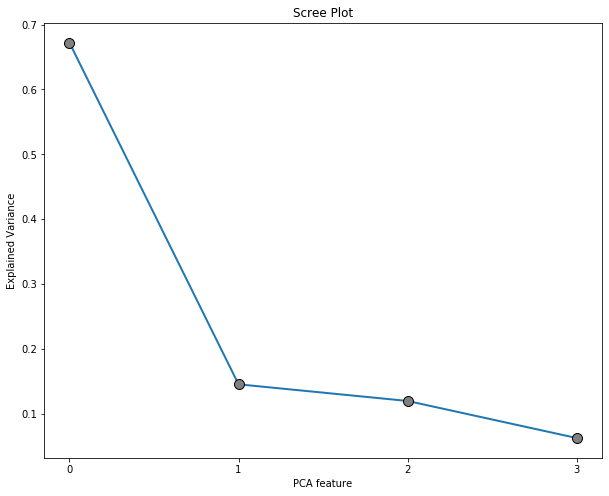

In [16]:
# INSTANTIATING a PCA object with no limit to principal components
pca = PCA(n_components = None,
          random_state = 802)


# FITTING and TRANSFORMING the purchases_scaled
customer_pca = pca.fit_transform(DNA_scaled)


# calling the scree_plot function
scree_plot(pca_object = pca)

In [17]:
# INSTANTIATING a new model using the first three principal components
pca_3 = PCA(n_components = 2,
            random_state = 802)


# FITTING and TRANSFORMING the purchases_scaled
customer_pca_3 = pca_3.fit_transform(DNA_scaled)

In [18]:
####################
### Max PC Model ###
####################
# transposing pca components (pc = MAX)
factor_loadings = pd.DataFrame(pd.np.transpose(pca.components_))


# naming rows as original features
factor_loadings = factor_loadings.set_index(DNA_scaled.columns)


##################
### 3 PC Model ###
##################
# transposing pca components (pc = 3)
factor_loadings_3 = pd.DataFrame(pd.np.transpose(pca_3.components_))


# naming rows as original features
factor_loadings_3 = factor_loadings_3.set_index(DNA_scaled.columns)


# checking the results
print(f"""
MAX Components Factor Loadings
------------------------------
{factor_loadings.round(2)}


3 Components Factor Loadings
------------------------------
{factor_loadings_3.round(2)}
""")


MAX Components Factor Loadings
------------------------------
                   0     1     2     3
Growth mindset -0.45 -0.89  0.11  0.01
thinking       -0.51  0.16 -0.68 -0.50
communication  -0.49  0.33  0.72 -0.36
teamwork       -0.54  0.27 -0.11  0.79


3 Components Factor Loadings
------------------------------
                   0     1
Growth mindset -0.45 -0.89
thinking       -0.51  0.16
communication  -0.49  0.33
teamwork       -0.54  0.27



In [19]:
# Defining Components
# 0	Cold_Realist OR MIXED
# 1	Calm_Outsider
# 2	Calm_Insider
# 3	Polite_Realist
# 4	Polite_Dreamer


# naming each principal component
factor_loadings_3.columns = ['All_rounded',
                             'Fixed_mindset']


# checking the result
factor_loadings_3

,All_rounded,Fixed_mindset
Growth mindset,-0.446245,-0.887865
thinking,-0.510625,0.164284
communication,-0.493807,0.333042
teamwork,-0.544318,0.271641


In [20]:
# analyzing factor strengths per customer
X_pca_reduced = pca_3.transform(DNA_scaled)


# converting to a DataFrame
X_pca_df = pd.DataFrame(X_pca_reduced)


# checking the results
X_pca_df

,0,1
0,-0.002383,0.220857
1,-0.679811,0.641645
2,1.487602,0.726955
3,-1.107024,-0.703995
4,2.826972,0.185851
5,1.140956,-0.460015
6,-0.901223,-0.806700
7,-1.955355,-0.358077
8,-0.262492,0.378237
9,0.626454,-0.203254


In [21]:
pd.np.var(X_pca_df)

0    2.688460
1    0.581826
dtype: float64

In [22]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(X_pca_df)


# TRANSFORMING our data after fit
X_scaled_pca = scaler.transform(X_pca_df)


# converting scaled data into a DataFrame
pca_scaled = pd.DataFrame(X_scaled_pca)


# reattaching column names
pca_scaled.columns = ['All_rounded',
                             'Fixed_mindset']


# checking pre- and post-scaling variance
print(pd.np.var(X_pca_df), '\n\n')
print(pd.np.var(pca_scaled))

0    2.688460
1    0.581826
dtype: float64 


All_rounded      1.0
Fixed_mindset    1.0
dtype: float64


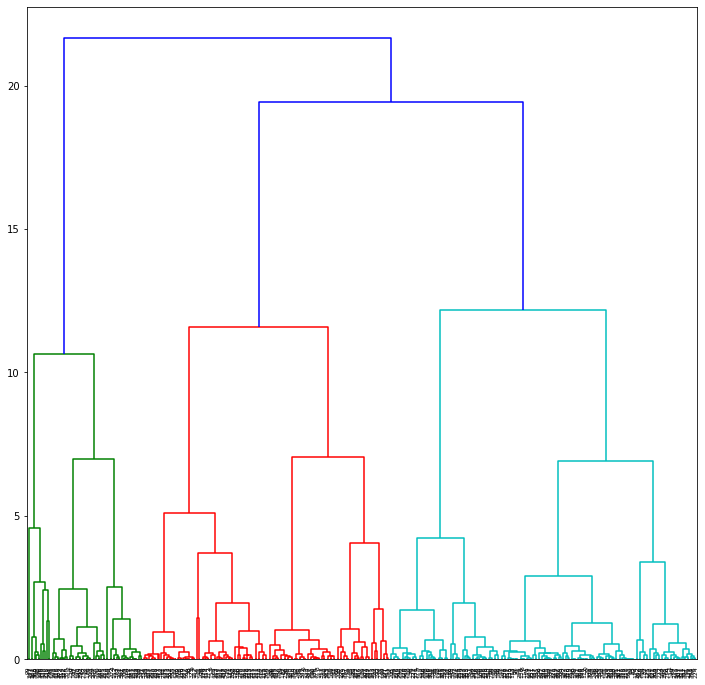

In [23]:
# grouping data based on Ward distance
standard_mergings_ward = linkage(y = pca_scaled,
                                 method = 'ward')


# setting plot size
fig, ax = plt.subplots(figsize=(12, 12))

# developing a dendrogram
dendrogram(Z = standard_mergings_ward,
           leaf_rotation = 90,
           leaf_font_size = 6)


# saving and displaying the plot
plt.savefig('standard_hierarchical_clust_ward.png')
plt.show()

In [74]:
########################################
# inertia
########################################
def interia_plot(data, max_clust = 50):
    """
PARAMETERS
----------
data      : DataFrame, data from which to build clusters. Dataset should be scaled
max_clust : int, maximum of range for how many clusters to check interia, default 50
    """

    ks = range(1, max_clust)
    inertias = []


    for k in ks:
        # INSTANTIATING a kmeans object
        model = KMeans(n_clusters = k)


        # FITTING to the data
        model.fit(data)


        # append each inertia to the list of inertias
        inertias.append(model.inertia_)



    # plotting ks vs inertias
    fig, ax = plt.subplots(figsize = (12, 8))
    plt.plot(ks, inertias, '-o')


    # labeling and displaying the plot
    plt.xlabel('number of clusters, k')
    plt.ylabel('inertia')
    plt.xticks(ks)
    plt.show()


########################################
# scree_plot
########################################
def scree_plot(pca_object, export = False):
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('top_customers_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()

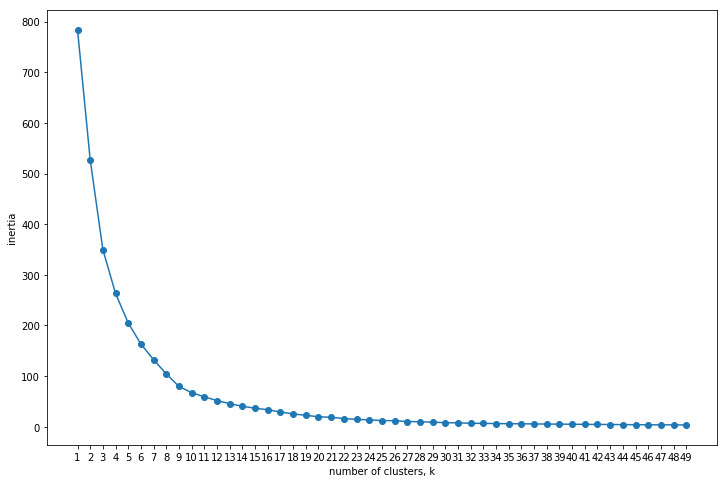

In [75]:
# calling the inertia_plot() function
interia_plot(data = pca_scaled)

In [76]:
# INSTANTIATING a k-Means object with three clusters
customers_k_pca = KMeans(n_clusters = 3,
                         random_state = 802)


# fitting the object to the data
customers_k_pca.fit(pca_scaled)


# converting the clusters to a DataFrame
customers_kmeans_pca = pd.DataFrame({'Cluster': customers_k_pca.labels_})


# checking the results
print(customers_kmeans_pca.iloc[: , 0].value_counts())

0    153
2    126
1    113
Name: Cluster, dtype: int64


In [78]:
# 0	Cold_Realist OR MIXED
# 1	Calm_Outsider
# 2	Calm_Insider

# storing cluster centers
centroids_pca = customers_k_pca.cluster_centers_


# converting cluster centers into a DataFrame
centroids_pca_df = pd.DataFrame(centroids_pca)


# renaming principal components
centroids_pca_df.columns = ['All_rounded',
                             'Fixed_mindset']


# checking results (clusters = rows, pc = columns)
centroids_pca_df.round(2)

,All_rounded,Fixed_mindset
0,0.05,0.86
1,-1.10,-0.44
2,0.93,-0.65


In [79]:
# Changing Mac to Macbook
my_df['Current laptop'] =  my_df['Current laptop'].replace('MAC', 'Macbook')
my_df['Next laptop'] =  my_df['Next laptop'].replace('MAC', 'Macbook')

In [81]:
# concatenating cluster memberships with principal components
clst_pca_df = pd.concat([customers_kmeans_pca,
                         X_pca_df],
                         axis = 1)


# checking results
clst_pca_df


# concatenating demographic information with pca-clusters
final_pca_clust_df = pd.concat([my_df.loc[ : , ['Current laptop', 'Next laptop', 'Program', 'Gender', 'age_range',
                                                'Nationality_continent', 'Ethnicity']],
                                clst_pca_df],
                                axis = 1)


# renaming columns
final_pca_clust_df.columns = ['Current laptop',
                              'Next laptop',
                              'Program',
                              'Gender',
                              'age_range',
                              'Nationality_continent',
                              'Ethnicity',
                              'Cluster',
                              'All_rounded',
                             'Fixed_mindset']




In [83]:
# renaming clusters
cluster_names = {0 : 'Cluster 1',
                 1 : 'Cluster 2',
                 2 : 'Cluster 3'
                }


final_pca_clust_df['Cluster'].replace(cluster_names, inplace = True)


# adding a productivity step
data_df = final_pca_clust_df


In [84]:
data_df[data_df['Current laptop']=='Macbook'][data_df['Cluster'] == 'Cluster 1']

/Users/Piya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Current laptop,Next laptop,Program,Gender,age_range,Nationality_continent,Ethnicity,Cluster,All_rounded,Fixed_mindset
0,Macbook,Macbook,DD (MIB & Business Analytics),Female,20-25,South American,Hispanic / Latino,Cluster 1,-0.002383,0.220857
11,Macbook,Macbook,One year Business Analytics,Female,20-25,Africa,African American,Cluster 1,0.488656,0.025672
14,Macbook,Macbook,One year Business Analytics,Male,26-30,Asian,Far east Asian,Cluster 1,-0.699222,0.518747
19,Macbook,Macbook,DD (MIB & Business Analytics),Female,20-25,Asian,Far east Asian,Cluster 1,1.464138,0.788531
20,Macbook,Macbook,One year Business Analytics,Female,26-30,Asian,Far east Asian,Cluster 1,-0.002383,0.220857
22,Macbook,Macbook,DD (MIB & Business Analytics),Male,20-25,Asian,Prefer not to answer,Cluster 1,1.519577,0.882302
27,Macbook,Windows laptop,DD (MIB & Business Analytics),Female,20-25,European,White / Caucasian,Cluster 1,-2.219265,1.227455
31,Macbook,Macbook,DD (MIB & Business Analytics),Male,26-30,European,Middle Eastern,Cluster 1,-0.159592,0.326885
34,Macbook,Macbook,DD (MIB & Business Analytics),Male,20-25,European,White / Caucasian,Cluster 1,0.374321,0.193022
45,Macbook,Macbook,One year Business Analytics,Male,20-25,Asian,Far east Asian,Cluster 1,2.319317,0.533060


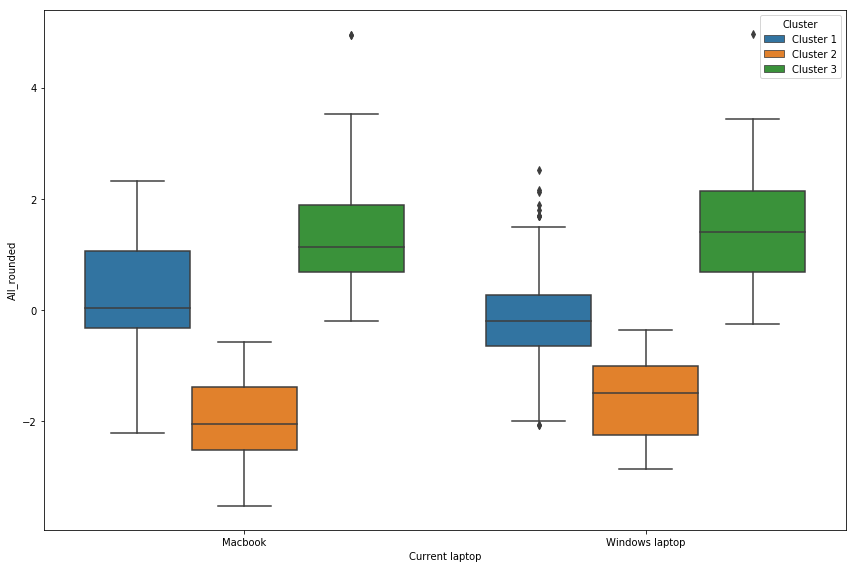

In [86]:
########################
# Current laptop
########################

# Balanced
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Current laptop',
            y = 'All_rounded',
            hue = 'Cluster',
            data = data_df)


plt.tight_layout()
plt.show()

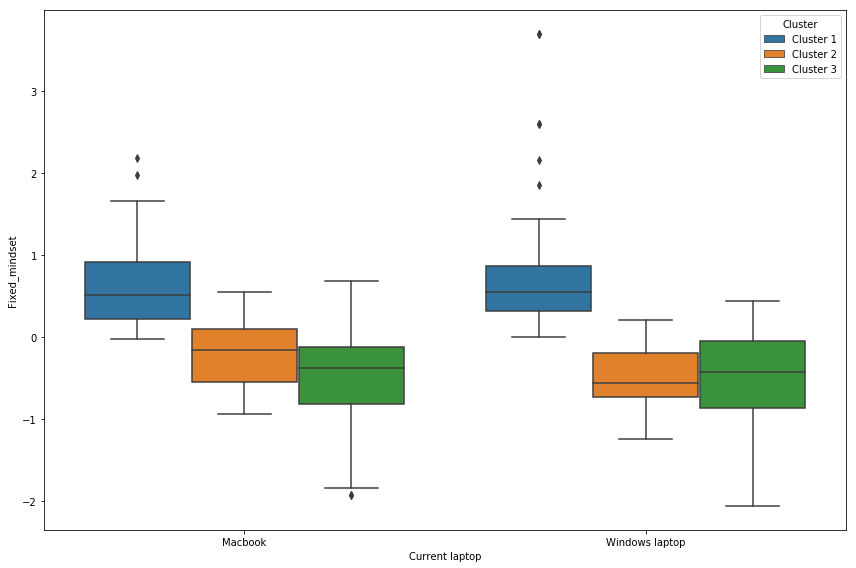

In [87]:
########################
# Current laptop
########################

# Balanced
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Current laptop',
            y = 'Fixed_mindset',
            hue = 'Cluster',
            data = data_df)


plt.tight_layout()
plt.show()

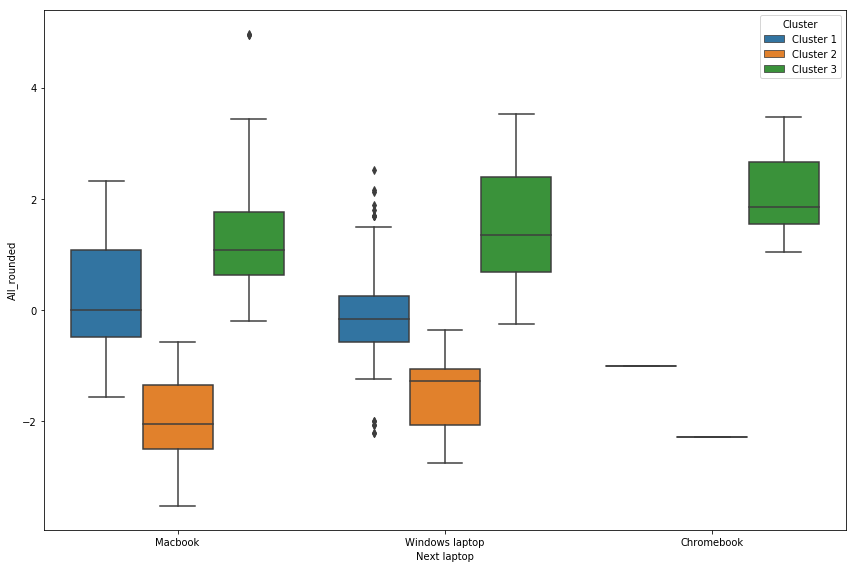

In [88]:
########################
# Next laptop
########################

# Balanced
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Next laptop',
            y = 'All_rounded',
            hue = 'Cluster',
            data = data_df)


plt.tight_layout()
plt.show()

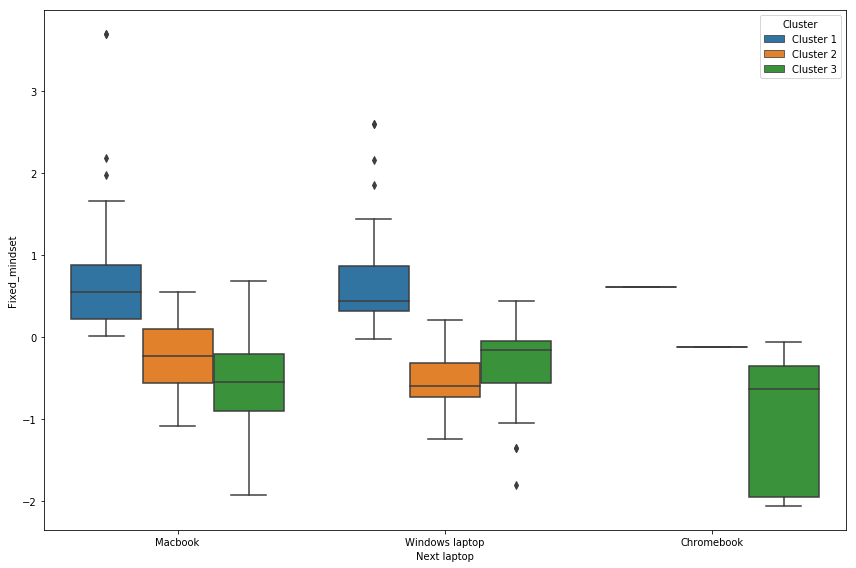

In [89]:
########################
# Next laptop
########################

# Balanced
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Next laptop',
            y = 'Fixed_mindset',
            hue = 'Cluster',
            data = data_df)


plt.tight_layout()
plt.show()

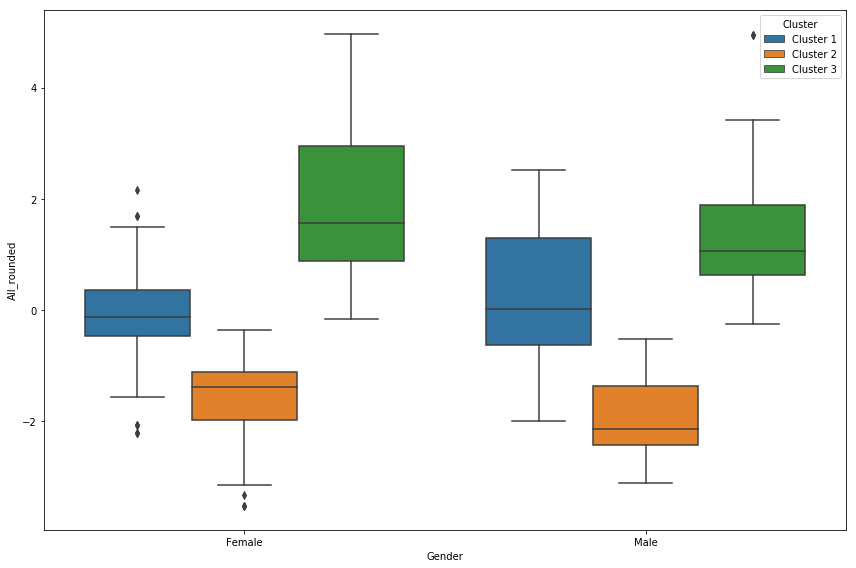

In [90]:
########################
# Gender
########################

# Balanced
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Gender',
            y = 'All_rounded',
            hue = 'Cluster',
            data = data_df)


plt.tight_layout()
plt.show()

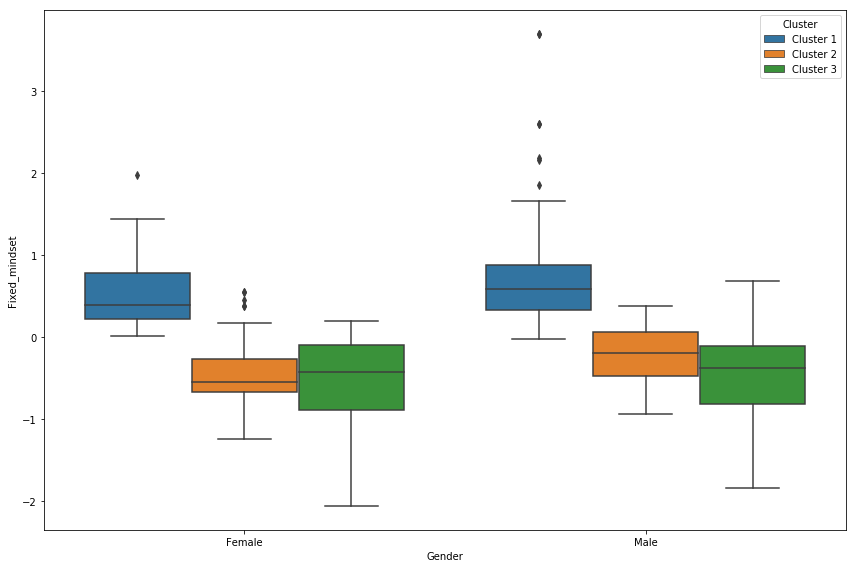

In [91]:
########################
# Gender
########################

# Balanced
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Gender',
            y = 'Fixed_mindset',
            hue = 'Cluster',
            data = data_df)


plt.tight_layout()
plt.show()

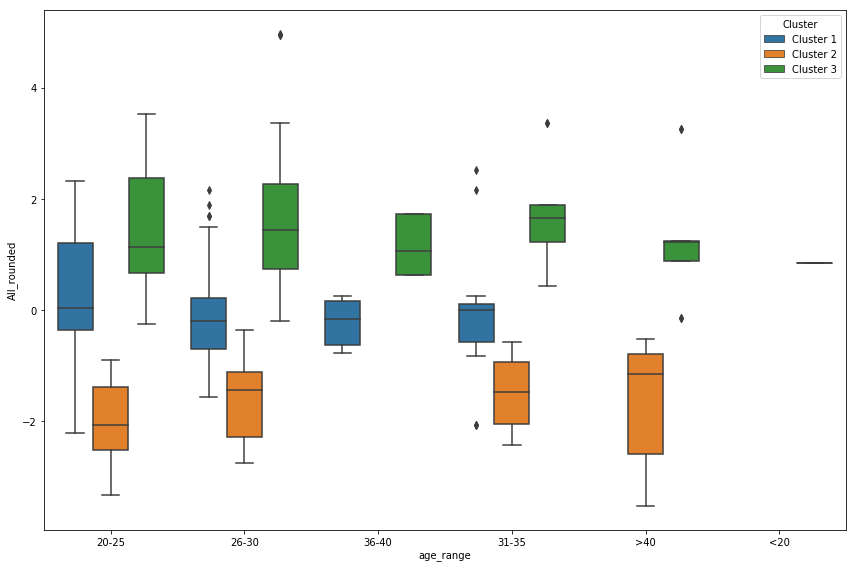

In [92]:
########################
# Age
########################

# Balanced
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'age_range',
            y = 'All_rounded',
            hue = 'Cluster',
            data = data_df)


plt.tight_layout()
plt.show()

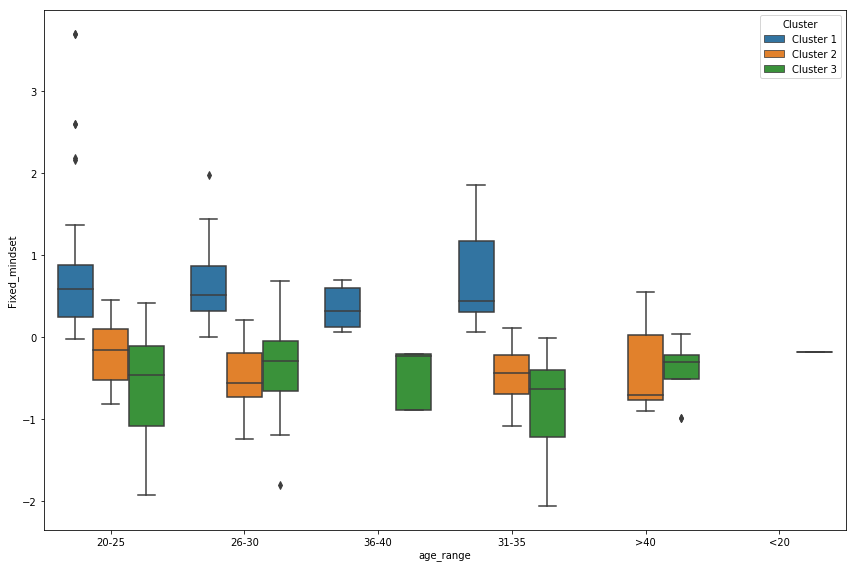

In [93]:
########################
# Age
########################

# Balanced
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'age_range',
            y = 'Fixed_mindset',
            hue = 'Cluster',
            data = data_df)


plt.tight_layout()
plt.show()

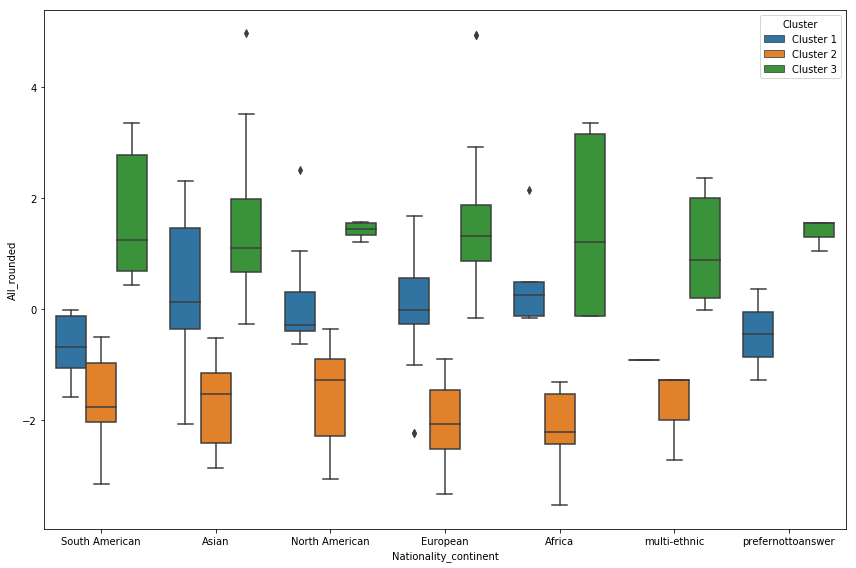

In [94]:
########################
# Nationality
########################

# Balanced
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Nationality_continent',
            y = 'All_rounded',
            hue = 'Cluster',
            data = data_df)


plt.tight_layout()
plt.show()

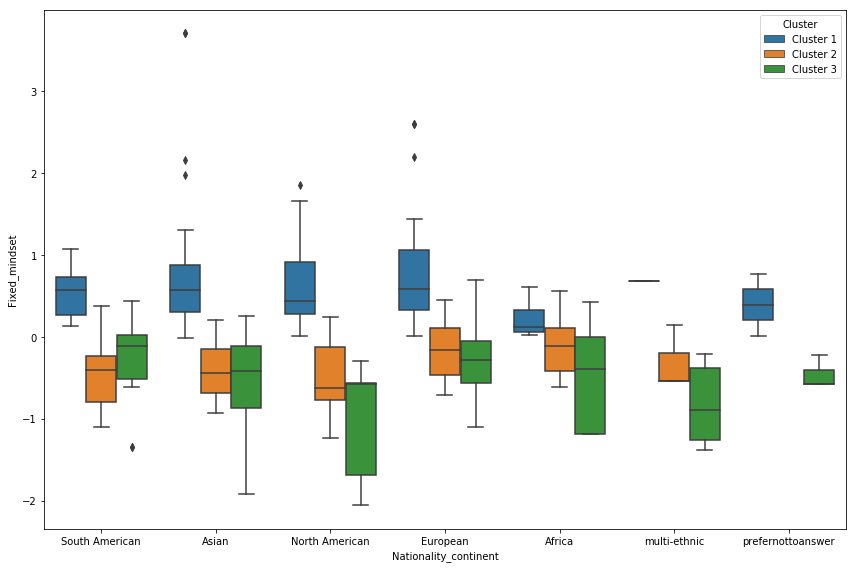

In [95]:
########################
# Nationality
########################

# Balanced
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Nationality_continent',
            y = 'Fixed_mindset',
            hue = 'Cluster',
            data = data_df)


plt.tight_layout()
plt.show()

In [24]:
# looking for the variances in means

my_df.groupby(['Current laptop']).mean().round(2)

# On average window users are slightly more embracing changes and demonstre dynamic thinking 
# since the winodw users have more other brands than Mac user in terms of the options.
# Also window users are slightly more team workers and approach the conflict more constructviely than Mac users. 

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,DNA_1,DNA_3,DNA_4,DNA_5,DNA_6,DNA_7,DNA_8,DNA_9,DNA_10,DNA_11,DNA_13,DNA_14,DNA_15,DNA_17,DNA_18,DNA_19,DNA_20,DNA_21,Age,DNA_2n,DNA_12n,DNA_16n,Growth mindset,thinking,communication,teamwork
Current laptop,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
MAC,3.00,4.00,4.00,5.00,2.00,2.00,4.00,5.00,2.00,1.00,3.00,4.00,5.00,4.00,5.00,2.00,4.00,3.00,2.00,1.00,4.00,2.00,2.00,4.00,5.00,2.00,4.00,4.00,3.00,1.00,3.00,2.00,4.00,4.00,4.00,2.00,3.00,2.00,4.00,2.00,4.00,4.00,3.00,4.00,4.00,2.00,4.00,4.00,3.00,5.00,5.00,3.00,4.00,4.00,3.00,2.00,4.00,4.00,4.00,4.00,3.00,5.00,3.00,3.00,4.00,2.00,4.00,5.00,45.00,4.00,4.00,3.00,4.00,3.25,3.67,3.64
Macbook,3.10,2.76,3.55,3.06,3.38,2.73,3.82,2.34,3.30,2.53,3.70,1.74,4.07,3.64,4.07,3.00,4.14,2.32,2.83,2.15,3.53,2.47,3.36,2.88,3.85,2.47,3.74,2.29,2.64,2.03,3.06,2.23,3.86,2.88,3.92,3.15,3.65,2.38,2.75,2.71,3.16,3.98,3.70,2.73,3.93,3.17,3.81,3.69,2.61,3.78,3.91,4.00,4.16,3.97,3.85,4.12,4.04,3.91,4.09,4.01,4.15,4.24,3.93,3.95,3.89,3.98,3.70,4.19,25.90,3.66,3.25,3.47,4.16,4.00,3.77,3.97
Windows laptop,2.78,2.75,3.58,2.73,3.25,3.08,3.84,2.52,3.31,2.29,3.59,1.72,4.10,3.54,3.89,3.23,4.09,2.32,2.96,2.11,3.21,2.43,3.22,2.62,3.86,2.74,3.80,2.33,2.33,2.21,2.77,2.31,3.77,2.66,3.89,3.29,3.70,2.27,2.22,2.70,2.86,3.89,3.68,2.42,3.91,3.70,3.96,3.85,2.34,3.80,3.92,4.01,4.13,3.93,3.86,3.95,4.01,3.86,3.93,4.07,4.10,4.28,3.96,3.88,3.99,4.15,3.83,4.36,28.73,3.62,3.13,3.52,4.13,4.02,3.74,4.00
